In [1]:
import networkx as nx
import random as r
import matplotlib.pyplot as plt
import numpy as np

from networkx.algorithms.assortativity import neighbor_degree

In [6]:
def make_lattice(l,m):
  '''

  there is no periodic boundary
  
  _________

  l : triangular lattice width
  m : triangular lattice height 
  
  '''
  lattice = nx.triangular_lattice_graph(m=l, n=m, periodic=False, with_positions=True, create_using=None)
  pos = nx.get_node_attributes(lattice, 'pos')
  return lattice, pos

In [56]:
G,pos = make_lattice(2,4)

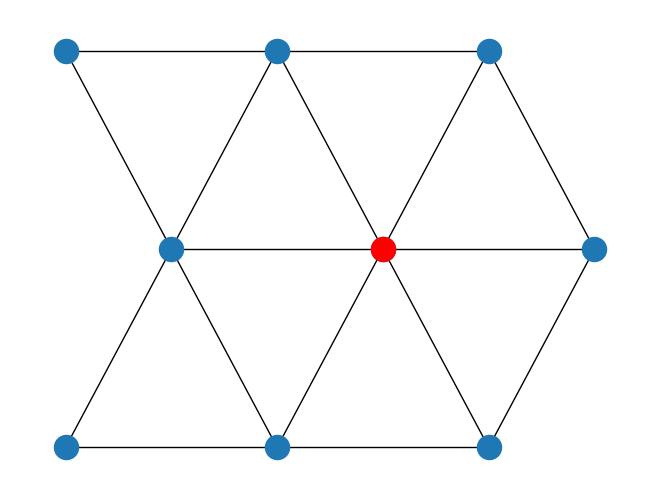

In [68]:
nx.draw(G,pos, node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,1)],node_color='red', node_size=300)
plt.savefig('intro1.pdf',format='pdf',dpi=150)


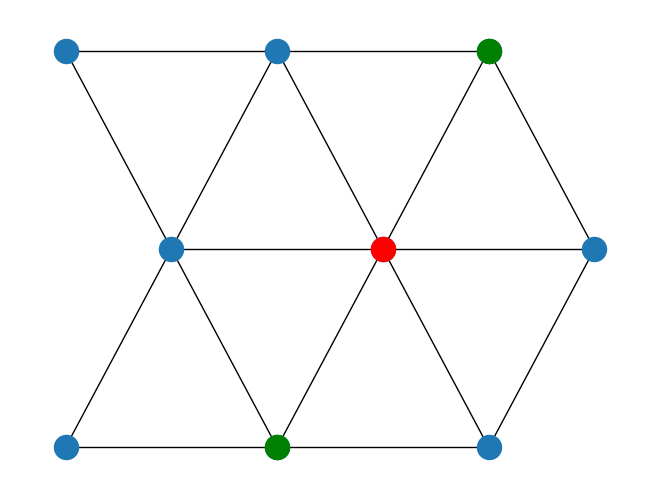

In [69]:
nx.draw(G,pos, node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,1)],node_color='red', node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,0),(2,2)],node_color='green', node_size=300)
plt.savefig('intro2.pdf',format='pdf',dpi=150)


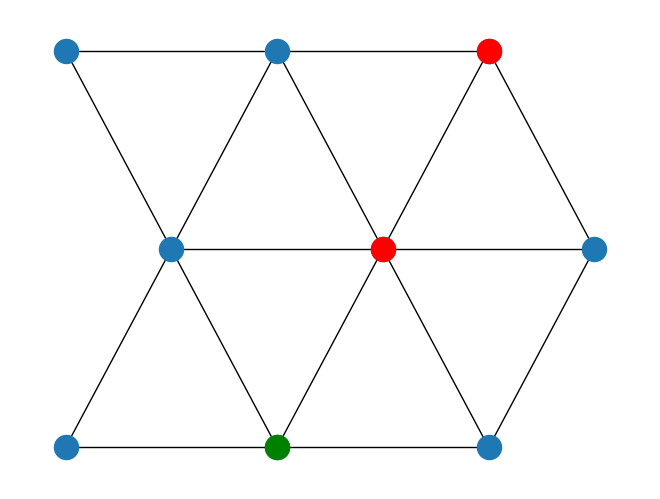

In [70]:
nx.draw(G,pos, node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,1),(2,2)],node_color='red', node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,0)],node_color='green', node_size=300)
plt.savefig('intro3_1.pdf',format='pdf',dpi=150)


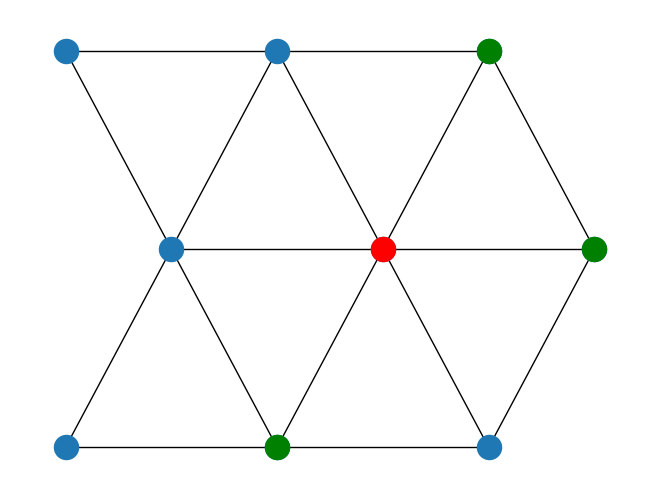

In [71]:
nx.draw(G,pos, node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,1)],node_color='red', node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,0),(2,2),(2,1)],node_color='green', node_size=300)
plt.savefig('intro3_2.pdf',format='pdf',dpi=150)


In [74]:
[n for n in G.neighbors((1,1))]

[(0, 1), (2, 1), (1, 0), (1, 2), (2, 2), (2, 0)]

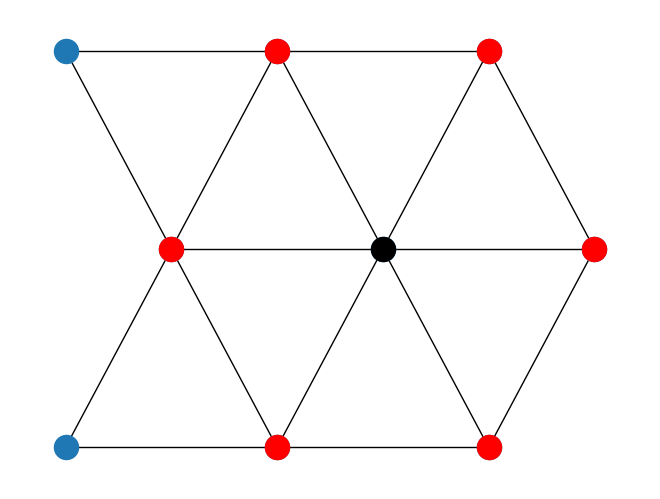

In [76]:
nx.draw(G,pos, node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[n for n in G.neighbors((1,1))],node_color='red', node_size=300)
nx.draw_networkx_nodes(G,pos,nodelist=[(1,1)],node_color='black', node_size=300)

plt.savefig('intro4.pdf',format='pdf',dpi=150)

In [3]:
def temp(l,m,n,seed_number, q):
    # make triangular lattice
    G = nx.triangular_lattice_graph(m=l, n=m, periodic=False, with_positions=True, create_using=None)
    pos = nx.get_node_attributes(G, 'pos')




    # 모든 노드에 감염되었는지 아닌지 라벨을 정해 0이면 감염 안된거 1이면 감염된 거
    # 일단 모든 노드에 대해서 감염이 안된거라고 해두자
    nx.set_node_attributes(G=G,
                        values = {(i,j):{'occupied':0} for i,j in G.nodes})

    # center는 무조건 걸리게 해뒀음 나중에는 바꿀 꺼임
    # center = (l//2, l//2)
    # G.nodes[center]['occupied'] = 1

    # 초기에 나오는 seed값을 정해보고 상태를 바꾼다
    for i in range(seed_number):
        # 지금은 가장자리에 잘 안 분포되게 해놓는게 좋을 거 같아서 1 l로 범위를 잡아높고 나중에 uniform distribution같은걸로 값을 넣어주는게 필요할 듯
        G.nodes[(r.randrange(1,l),r.randrange(1,l))]['occupied'] = 1

    
    
    occupied_list = []

    step=0
    while(step < n):

        # neighbors는 스텝에 따라서 달라질 수 있기 때문에 초기에 다시 세팅해야됨
        neighbors_list=[]
        occupied_set = set()
        # 해당 스텝에서 
        
        # G.nodes(data=True) 이걸로 하면 노드만 나오느게 아니라 같이 attribute도 dict 형태로 나오게 된다. 그래서 i만 써도 됨 j 가 attribute
        selected_nodes = [i for i,j in G.nodes(data=True) if G.nodes[(i)]['occupied'] == 1] 
        occupied_list.append(selected_nodes)
        # 우리가 원하는 스텝에 따라서 해당하는 총 감염된거의 리스트다
        # occupied_list.append(selected_nodes)

        for i in selected_nodes:
            # list in set in tuple
            neighbors_list.append([n for n in G.neighbors(i)])

        
        # occupied_list.append(center)
        # 확률

        # 이웃에 대해서 
        for i in neighbors_list:
            # 리스트 안에있는 집합에 대해서 보자
            for j in i:
                # 이러면 주의해야되는게 어떤 노드가 근처에 2개 이상의 감염된 노드가 있으면 두번의 감염될 확률이 올라가는건데 그러면 좋은거잖아?
                occupied_set.add(tuple(j*np.random.choice([0,1],1,p=[1-q, q])))
        occupied_set.discard((0,0))
        # occupied_set에 있는 것들은 1로 상태를 바꿔준다.
        for i in list(occupied_set):
            G.nodes[(i)]['occupied'] = 1
        
        step += 1
    return occupied_list, G, pos

In [79]:
# l : triangular lattice width
# m : triangular lattice height 
l = 100
m = 200
# time step 몇번째 까지 진행할건지
n= 20

# initial infected cell number
seed_number = 6
#확률
q=0.2


plaque_seq, G, pos = temp(l,m,n,seed_number,q)

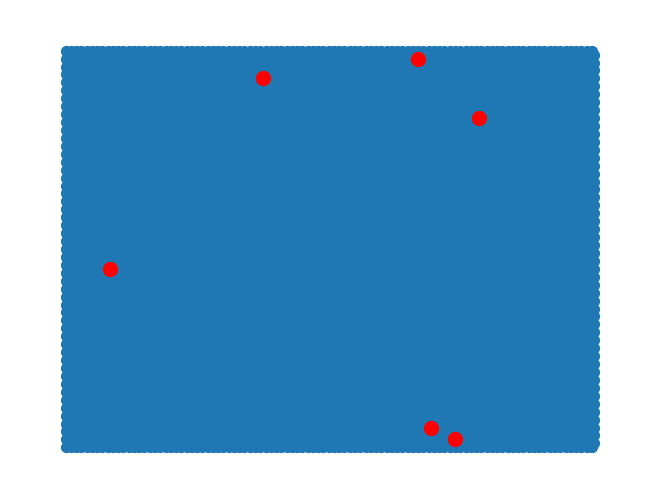

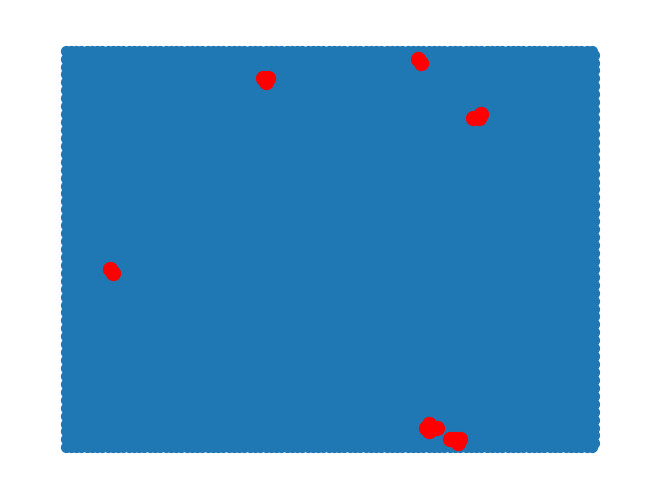

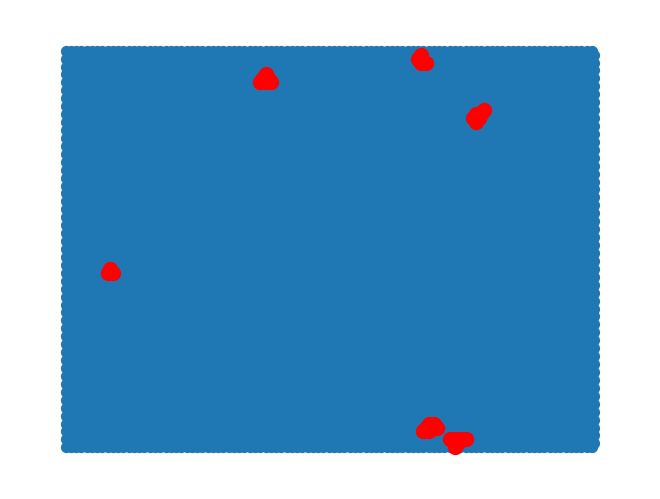

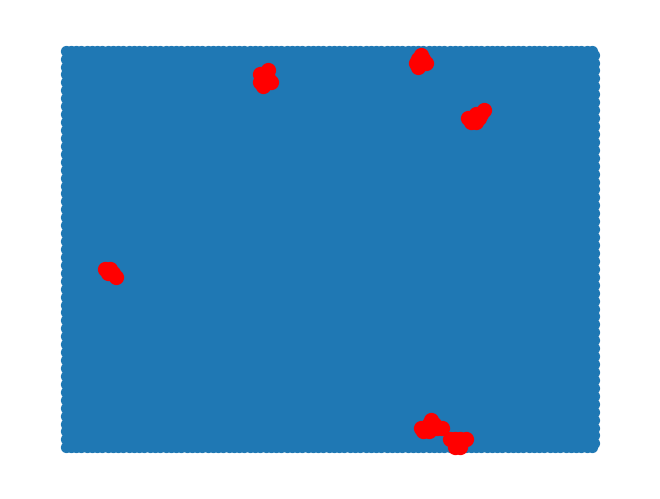

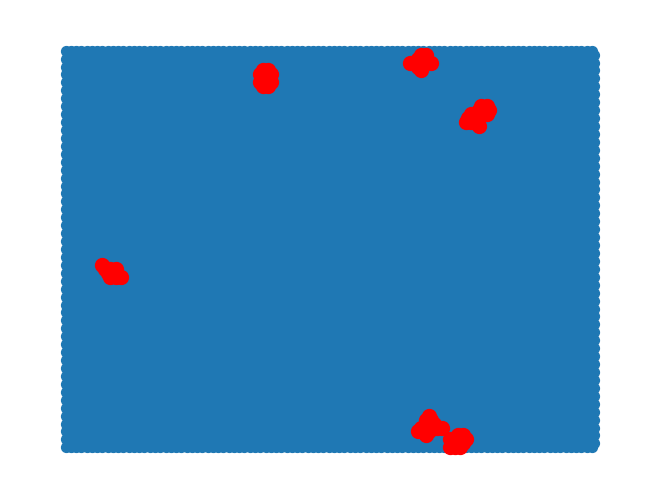

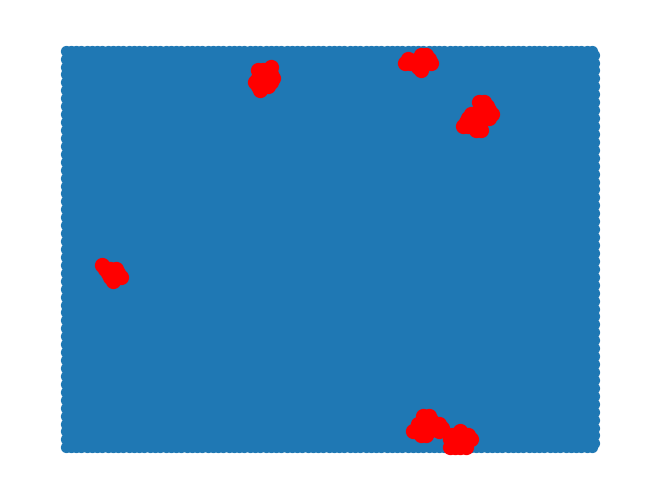

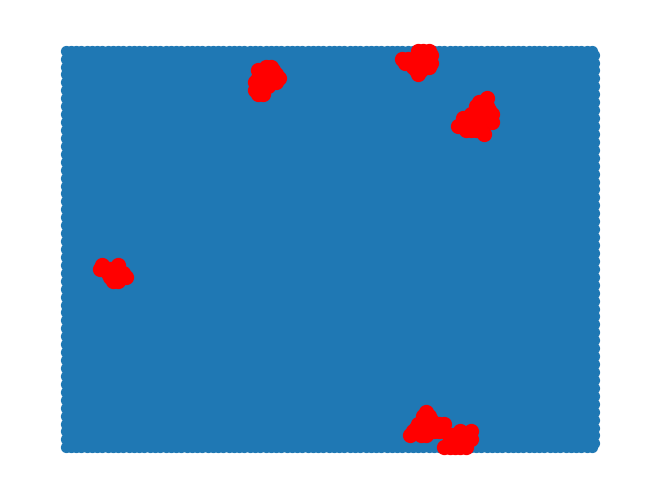

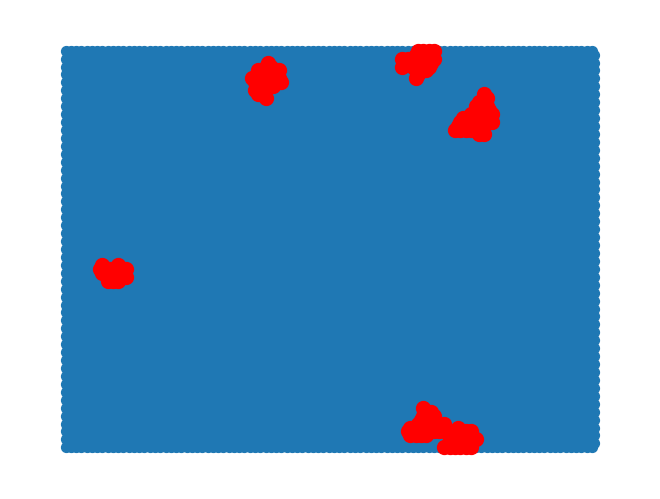

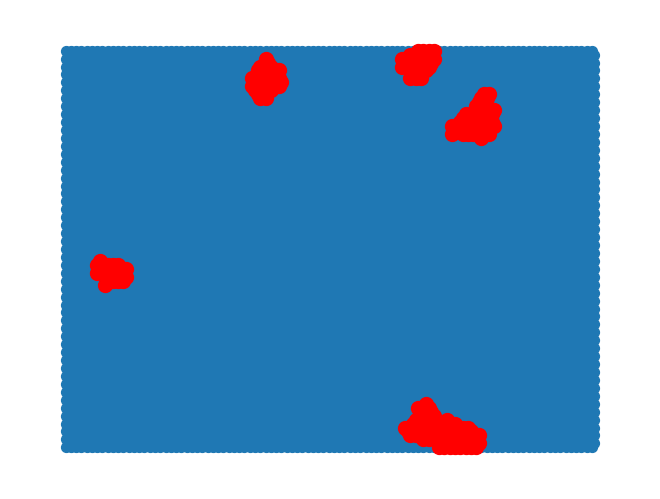

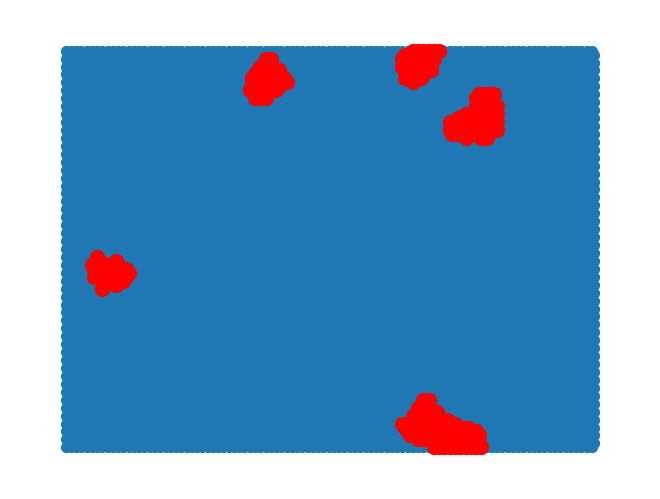

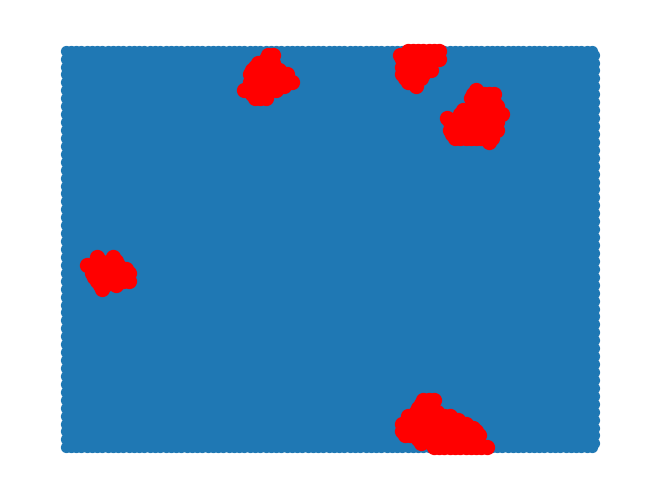

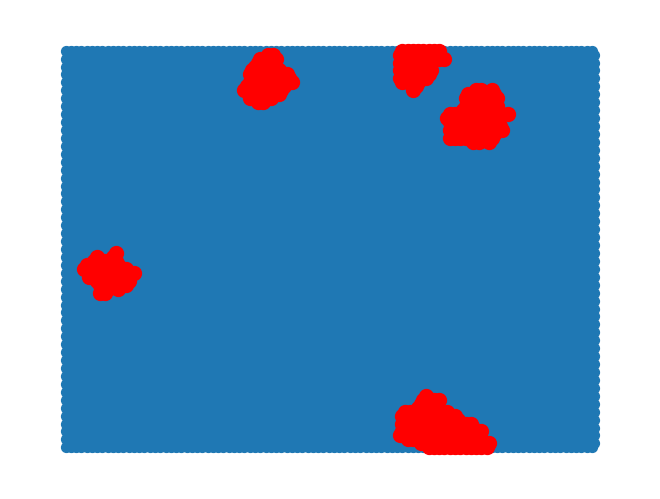

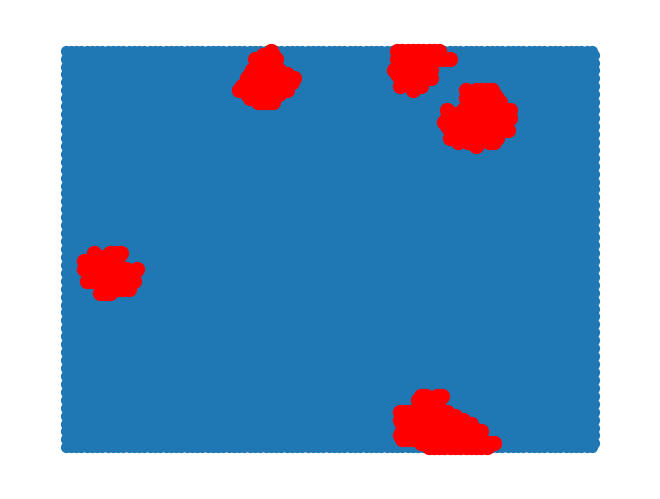

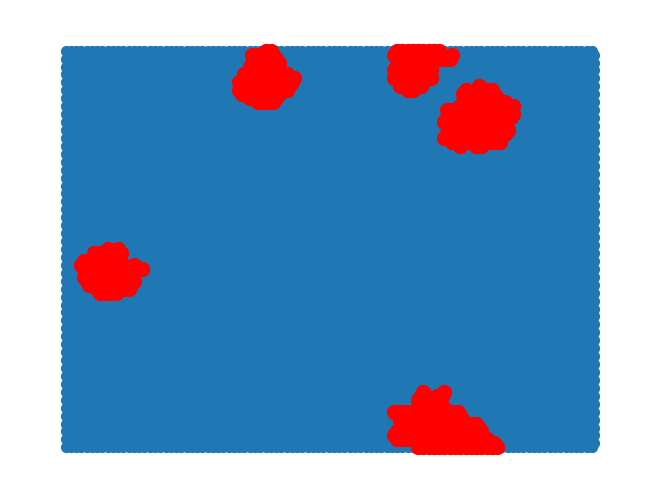

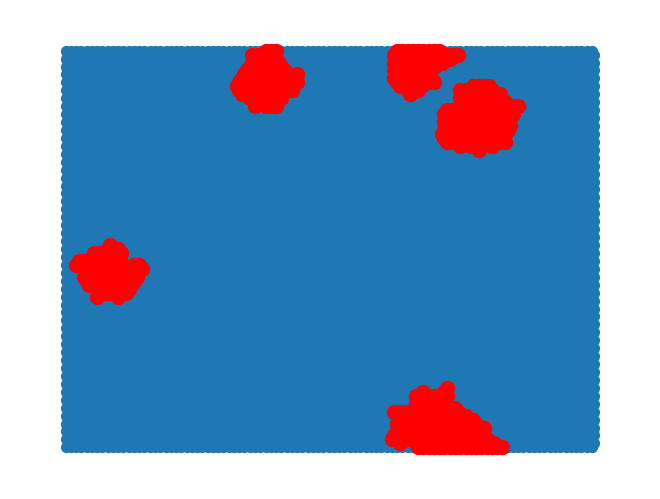

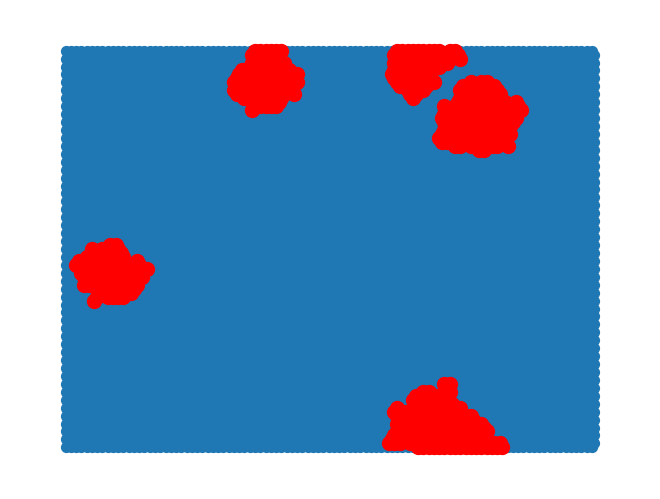

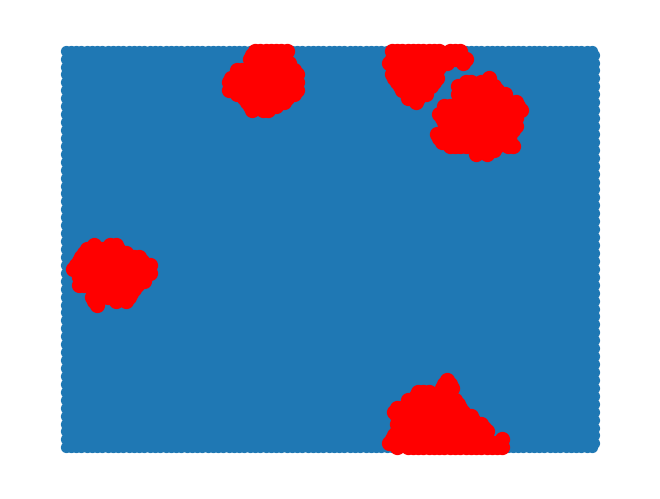

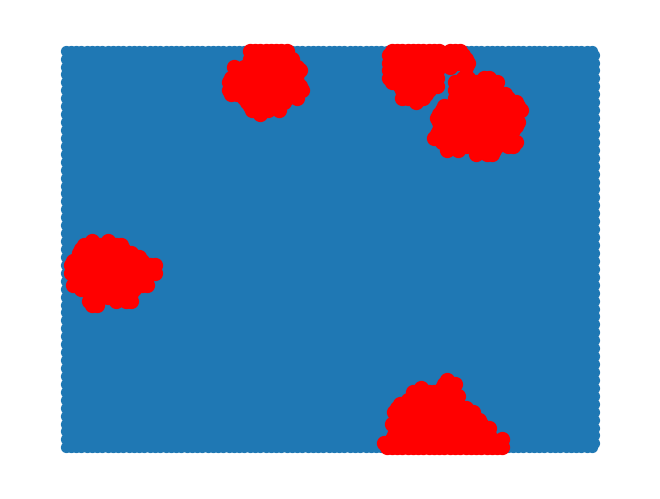

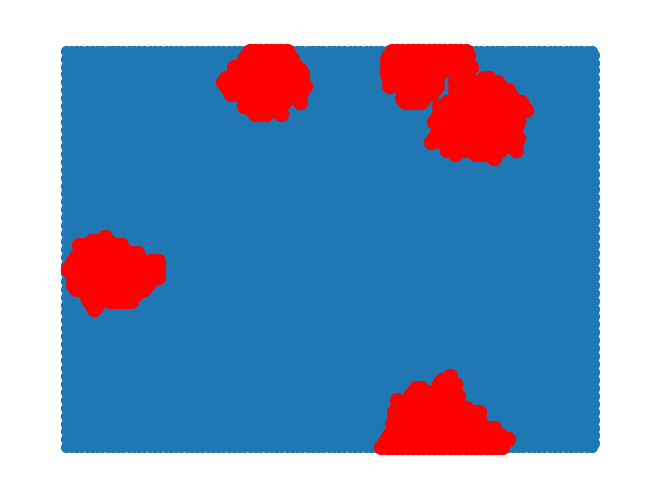

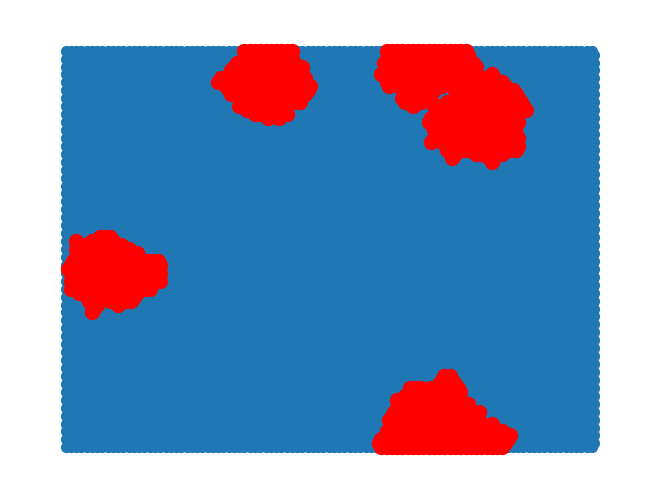

In [80]:
j = 0

path = '/Users/juseongkim/Documents/대학원/epidemic spreading/Epidemic_speading/result/'
for i in plaque_seq:
    plt.figure()
    nx.draw(G,pos, node_size=50)
    nx.draw_networkx_nodes(G,pos,nodelist=i,node_color='red', node_size=100)
    j += 1
    # plt.savefig(path + f'prob_model{j}.png')
    plt.show()

In [6]:
import imageio
import os
import natsort

path = '/Users/juseongkim/Documents/대학원/epidemic spreading/Epidemic_speading/result/Fig/'
file_list = os.listdir(path)

file_list_png = [file for file in file_list if file.endswith(".png")]
file_list_png = natsort.natsorted(file_list_png)

In [7]:
directory = '/Users/juseongkim/Documents/대학원/epidemic spreading/Epidemic_speading/result/Fig/'
image_type = '.png'
gif_name = 'p_model_large'
speed_sec = { 'duration': 0.3 } #사진 넘기는 시간

images = []

for file in file_list_png:
  file_path = os.path.join(directory, file)
  images.append(imageio.imread(file_path))
imageio.mimsave('{0}/{1}.gif'.format(directory, gif_name), images, **speed_sec)

/var/folders/7w/f3yz5lls31n4jsq13_dmd6z40000gn/T/ipykernel_65205/4284700472.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))
